# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [61]:
# Load pickled data
import pickle
import time

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/Users/cvar/SelfDrivingCar/Term_One/ProjectTwo/traffic-signs-data/train.p'
testing_file = '/Users/cvar/SelfDrivingCar/Term_One/ProjectTwo/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
coords_train = train['coords']
coords_test = test['coords']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [8]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

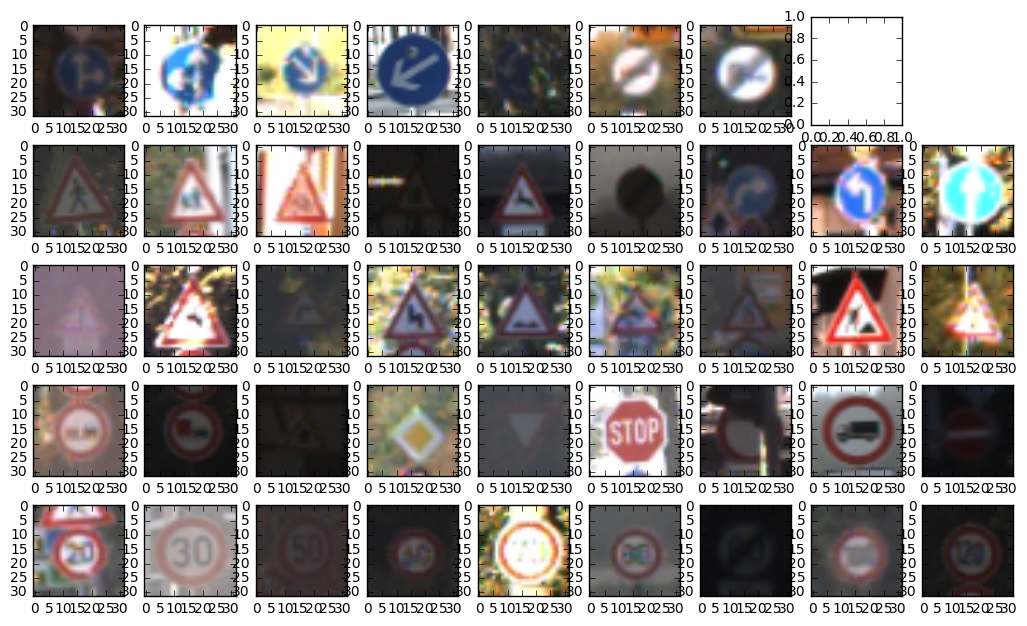

In [284]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# index = random.randint(0, n_train)
# image = X_train[index].squeeze()
# plt.figure(figsize=(1,1))
# plt.imshow(image)
# print(y_train[index])

sign_dict={}
class_count = 0
for i in range(len(y_train)):
    if y_train[i] not in sign_dict:
        sign_dict[y_train[i]] = X_train[i]
        class_count += 1
        if class_count == n_classes:
            break

#Show 20 images:
fig = plt.figure(num=0,figsize=(10,6))
plotrows = 5
plotcols = 9
rowratio = 1/(plotrows)
colratio = 1/(plotcols)
index = 0
for row in range(plotrows):
    if index >= n_classes:
        break
    for col in range(plotcols):
        rect = [col*colratio+0.01, row*rowratio+0.01, colratio-0.02, rowratio-0.02]
        subplot = fig.add_axes(rect)
        index = col + row*plotcols
        if index >= n_classes:
            break
        subplot.imshow(sign_dict[index])


In [10]:
#Frequency Analysis
freq = np.bincount(np.concatenate((y_train, y_test)))
for index, count in enumerate(freq):
    print("Sign #:", index, "frequency:", count)
# print(freq, type(freq), freq.shape)

Sign #: 0 frequency: 270
Sign #: 1 frequency: 2940
Sign #: 2 frequency: 3000
Sign #: 3 frequency: 1860
Sign #: 4 frequency: 2640
Sign #: 5 frequency: 2490
Sign #: 6 frequency: 570
Sign #: 7 frequency: 1890
Sign #: 8 frequency: 1860
Sign #: 9 frequency: 1950
Sign #: 10 frequency: 2670
Sign #: 11 frequency: 1740
Sign #: 12 frequency: 2790
Sign #: 13 frequency: 2880
Sign #: 14 frequency: 1050
Sign #: 15 frequency: 840
Sign #: 16 frequency: 570
Sign #: 17 frequency: 1470
Sign #: 18 frequency: 1590
Sign #: 19 frequency: 270
Sign #: 20 frequency: 450
Sign #: 21 frequency: 420
Sign #: 22 frequency: 510
Sign #: 23 frequency: 660
Sign #: 24 frequency: 360
Sign #: 25 frequency: 1980
Sign #: 26 frequency: 780
Sign #: 27 frequency: 300
Sign #: 28 frequency: 690
Sign #: 29 frequency: 360
Sign #: 30 frequency: 600
Sign #: 31 frequency: 1050
Sign #: 32 frequency: 300
Sign #: 33 frequency: 899
Sign #: 34 frequency: 540
Sign #: 35 frequency: 1590
Sign #: 36 frequency: 510
Sign #: 37 frequency: 270
Sign

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [212]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
print(type(X_train))
print(len(coords_train) + len(coords_test))
full_x = np.concatenate((X_train, X_test))
full_y = np.concatenate((y_train, y_test))
data_length = len(full_x)
# print("full length:", len(X), len(y))
# print(full_x[0:5])




<class 'numpy.ndarray'>
51839


In [213]:
# full_x = full_x/255
full_coords = np.concatenate((coords_train, coords_test))
print(full_coords[0])


[ 5  6 24 25]


In [215]:
print(full_x.shape)
print(full_y.shape)

(51839, 32, 32, 3)
(51839,)


Copy procedure: 0.000 secs
Hist iteration 1: 0.022 secs


/Users/cvar/PythonPrograms/DataAnalysis/miniconda3/envs/IntroToTensorFlow/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


Hist iteration 1001: 7.277 secs
Hist iteration 2001: 7.241 secs
Hist iteration 3001: 6.644 secs
Hist iteration 4001: 6.516 secs
Hist iteration 5001: 6.513 secs
Hist iteration 6001: 6.540 secs
Hist iteration 7001: 6.529 secs
Hist iteration 8001: 6.531 secs
Hist iteration 9001: 6.509 secs
Hist iteration 10001: 6.580 secs
Hist iteration 11001: 6.580 secs
Hist iteration 12001: 6.556 secs
Hist iteration 13001: 6.538 secs
Hist iteration 14001: 6.515 secs
Hist iteration 15001: 6.520 secs
Hist iteration 16001: 6.567 secs
Hist iteration 17001: 6.559 secs
Hist iteration 18001: 6.525 secs
Hist iteration 19001: 6.502 secs
Hist iteration 20001: 6.514 secs
Hist iteration 21001: 6.555 secs
Hist iteration 22001: 6.545 secs
Hist iteration 23001: 6.488 secs
Hist iteration 24001: 6.551 secs
Hist iteration 25001: 6.551 secs
Hist iteration 26001: 6.507 secs
Hist iteration 27001: 6.552 secs
Hist iteration 28001: 6.534 secs
Hist iteration 29001: 6.512 secs
Hist iteration 30001: 6.542 secs
Hist iteration 3100

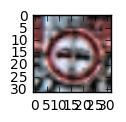

In [246]:
from skimage import exposure

#
copy_start = time.time()
num_cycles = 1
# copy_x = full_x.copy()
copy_x = np.ndarray(shape=full_x.shape)
copy_y = full_y.copy()
num_rows = len(copy_x)
copy_end = time.time()
print("Copy procedure: {:.3f} secs".format(copy_end - copy_start))

hist_sub_start = time.time()
for i in range(num_rows):
    img = full_x[i]
    copy_x[i] = exposure.equalize_adapthist(img)
    if i%1000 == 0:
        print("Hist iteration {0}: {1:.3f} secs".format(i+1, time.time() - hist_sub_start))
        hist_sub_start = time.time()

hist_end = time.time()
print("Hist procedure: {:.3f} secs".format(hist_end - copy_end))

index = random.randint(0, num_rows)
plt.figure(num=0, figsize=(1,1))
plt.imshow(copy_x[index])

# img = my_train_x[0]
# img_hist = exposure.equalize_adapthist(img)
print("Data peek:", copy_x[0,0,0,:])

In [250]:
# plt.figure(figsize=(1,1))
# plt.imshow(my_x[259194])
# print(my_y[259194])
my_x = copy_x.copy()
my_y = copy_y.copy()
print("Finished")

Finished


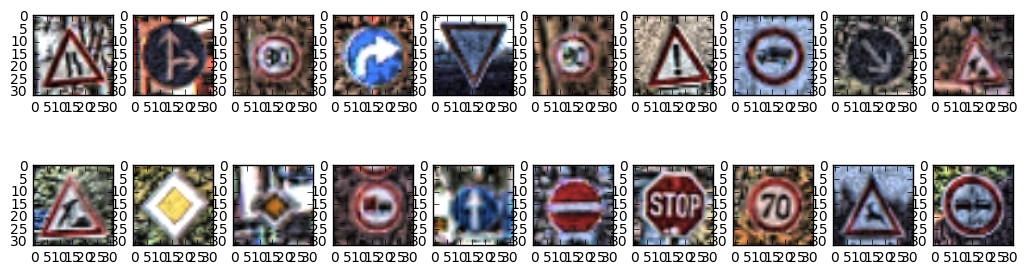

In [251]:
#Show 10 images:
len_my_x = len(my_x)
# plt.figure(figsize=(1,1))
fig = plt.figure(num=0,figsize=(10,3))
plotrows = 2
plotcols = 10
rowratio = 1/(plotrows)
colratio = 1/(plotcols)
for row in range(plotrows):
    for col in range(plotcols):
        rect = [col*colratio+0.01, row*rowratio+0.01, colratio-0.02, rowratio-0.02]
        subplot = fig.add_axes(rect)
        index = random.randint(0, len_my_x)
        subplot.imshow(my_x[index])
        
# print(my_x[0, 15, 15, :])


In [140]:
# import cv2

In [252]:
from sklearn.utils import shuffle

data_length = len_my_x
my_x, my_y = shuffle(my_x, my_y)
train_size = int(data_length * 0.7)
validation_size = int(data_length * 0.13)
test_size = int(data_length * 0.17)
print("Finished")

Finished


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_




**Answer:** 
My Preprocessing:
-------------
1. Performed histogram equalization on the data set. 
2. Normalized the scale of the images from [0,255] -> [0,1]
3. Shuffled the data as well

In [253]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
# from sklearn.utils import shuffle


# full_x, full_y = shuffle(full_x, full_y)
# train_size = int(data_length * 0.7)
# validation_size = int(data_length * 0.13)
# test_size = int(data_length * 0.17)

print("Sizes:", train_size, validation_size, test_size, train_size + validation_size + test_size )

my_train_x = my_x[0:train_size]
my_train_y = my_y[0:train_size]
my_valid_x = my_x[train_size:train_size + validation_size]
my_valid_y = my_y[train_size:train_size + validation_size]
my_test_x = my_x[train_size + validation_size:]
my_test_y = my_y[train_size + validation_size:]

my_train_x = np.pad(my_train_x, ((0,0), (2,2), (2,2), (0,0)), 'constant')
my_valid_x = np.pad(my_valid_x, ((0,0), (2,2), (2,2), (0,0)), 'constant')
my_test_x = np.pad(my_test_x, ((0,0), (2,2), (2,2), (0,0)), 'constant')
print("image shape:", my_train_x[0].shape)

train_size = len(my_train_x)
valid_size = len(my_valid_x)
test_size = len(my_test_x)
print("Array lengths:", train_size, valid_size, test_size)



Sizes: 36287 6739 8812 51838
image shape: (36, 36, 3)
Array lengths: 36287 6739 8813


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** I Split data into training, validation, and test tiers by shuffling the data and slicing it into pieces with the following percentages:
Training: 70%
Validation: 13%
Test: 17%

In [254]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten


def le_net(x, n_classes, mu, sigma):
    print("le_net: n_classes =", n_classes)
#     mu = 0.0
#     sigma = 0.05
#     mu = 0.0
#     sigma = 0.2
    
    input_shape = x[0].get_shape().as_list()

    #Layer 
    #------
    
    #Conv1 36x36x3 -> 32x32x6
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1,1,1,1], padding='VALID') + conv1_b
    
    #Activ1
    conv1 = tf.nn.relu(conv1)
    
    #Pooling1 32x32x6 -> 16x16x6
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides = [1,2,2,1], padding='VALID')
    
    
    #Layer 2
    #--------
    
    #Conv2 16x16x6 -> 12x12x16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding='VALID') + conv2_b
    
    #Activ2
    conv2 = tf.nn.relu(conv2)
    
    #Pooling2 12x12x16 -> 6x6x16
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides = [1,2,2,1], padding='VALID')
    
    
    #Flatten
    #--------
    
    fc_in = flatten(conv2)
    
    
    #Layer 3 
    #---------
    
    #(Fully connected)  576 -> 307
    out_dim_3 = 307
    fc1_W = tf.Variable(tf.truncated_normal(shape=(576, out_dim_3), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(out_dim_3))
    fc1 = tf.matmul(fc_in, fc1_W) + fc1_b
    
    #Activ 3
    fc1 = tf.nn.relu(fc1)
    
    
    #Layer 4 
    #---------
    
    #(Fully connected 2)  307 -> 215
    out_dim_4 = 215
    fc2_W = tf.Variable(tf.truncated_normal(shape=(out_dim_3, out_dim_4), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(out_dim_4))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    #Activ 4
    fc2 = tf.nn.relu(fc2)
    
    
    #Layer 5 
    #---------
    
    #(Fully connected 2)  215 -> 43
    fc3_W = tf.Variable(tf.truncated_normal(shape=(out_dim_4, n_classes), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
#     Activ 5
#     logits = tf.nn.relu(logits)
    
    return logits
    
    

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I used a similar structure to the le_net we built in the lab except that i added padding to the photo so the dimensions are slightly different.  Also, the width of the final logits array, is an input to my le_Net function so that the user can figure out what that should be ahead of time and feed it into the structure.  

Since the width of the final logits array is 43 for this problem, I decided to scale up some of the other fully connected layters so they could be multiples of the final layer width as was the case in the digit recognizer lenet architechture.  I decided to choose a 4th layer that was 4 times the final layer, I came to this multiple through trial and error.  Due to this I also expanded the width of the first fully connected layer.  In the lenet example the layer 4 was 70% of the width of the first fully connected layer.  I went with a similar ratio and scaled up the first fully connected layer after I made the decision to scale up layer 4.

My Lenet-like Architecture:
----------

Layer 1a: (5x5 convolution) // in:36x36x3 -> out:32x32x6   
Layer 1b: Relu activation   
Layer 1c: (2x2 max pooling) // in:32x32x6 -> out:16x16x6   

Layer 2a: (5x5 convolution) // in:16x16x6 -> out:12x12x16   
Layer 2b: Relu activation   
Layer 2c: (2x2 max pooling) // in:12x12x16 -> out:6x6x16   

{FLATTEN: 6x6x16 -> 576}

Layer 3: (Fully connected) // in:576 -> out:307

Layer 4: (Fully connected) // in:307 -> out:215

Layer 5: (Fully connected) // in:215 -> out:43

Output: logits with a width of 43

In [260]:
### Train your model here.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 36, 36, 3))
y = tf.placeholder(tf.int32, (None))
y_one_hot = tf.one_hot(y, n_classes)

EPOCHS = 20
BATCH_SIZE = 128
LEARN_RATE = 0.0005

MU = 0.0
SIGMA = 0.12

SAMPLE_SIZE = train_size

logits = le_net(x, n_classes, MU, SIGMA)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, y_one_hot)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=LEARN_RATE)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_one_hot, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(x_data, y_data):
    num_examples = len(x_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = x_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x:batch_x, y:batch_y})
        total_accuracy += (accuracy * len(batch_x))
        
    return total_accuracy / num_examples






le_net: n_classes = 43


In [261]:
import time

time_start = time.time()
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    
    print("Training...")
    print()
    
    for i in range(EPOCHS):
        epoch_start = time.time()
        my_train_x, my_train_y = shuffle(my_train_x, my_train_y)
        #not all train_size
        
        small_x = my_train_x[0:SAMPLE_SIZE]
        small_y = my_train_y[0:SAMPLE_SIZE]
        
        batch = 1
        batch_group_start = time.time()
        for offset in range(0, SAMPLE_SIZE, BATCH_SIZE):
            end = offset + BATCH_SIZE
#             batch_x, batch_y = my_train_x[offset:end], my_train_y[offset:end]
            batch_x, batch_y = small_x[offset:end], small_y[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            batch_end = time.time()
            if (batch%50 == 0):
                print("Batch {0} // Batch time {1:.2f}".format(batch, batch_end - batch_group_start))
                batch_group_start = time.time()
            batch += 1
            
        validation_accuracy = evaluate(my_valid_x, my_valid_y)
        print("Epoch", format(i+1), "->  Valid accuracy = {:.3f}".format(validation_accuracy))
        print("TIME -> EPOCH {0}: {1:.1f}sec.".format(i+1, time.time()- epoch_start), " |  TOTAL: {:.1f}sec".format(time.time() - time_start),)

#         print("Validation accuracy = {:.3f}".format(validation_accuracy))
#         print("Time -> Epoch: ", time.time()- epoch_start, "seconds.  |  Total:", time.time() - time_start)
        print()
        
    time_end = time.time()
    print("Elapsed time:", (time_end - time_start)/float(60.0), "minutes")
        
    saver.save(sess, "./lenet")
    print("model saved")
    
    

Training...

Batch 50 // Batch time 3.97
Batch 100 // Batch time 3.78
Batch 150 // Batch time 4.12
Batch 200 // Batch time 4.04
Batch 250 // Batch time 3.93
Epoch 1 ->  Valid accuracy = 0.860
TIME -> EPOCH 1: 24.9sec.  |  TOTAL: 42.5sec

Batch 50 // Batch time 3.96
Batch 100 // Batch time 4.11
Batch 150 // Batch time 4.07
Batch 200 // Batch time 3.93
Batch 250 // Batch time 3.90
Epoch 2 ->  Valid accuracy = 0.927
TIME -> EPOCH 2: 24.7sec.  |  TOTAL: 67.2sec

Batch 50 // Batch time 3.93
Batch 100 // Batch time 3.89
Batch 150 // Batch time 3.88
Batch 200 // Batch time 4.11
Batch 250 // Batch time 3.98
Epoch 3 ->  Valid accuracy = 0.954
TIME -> EPOCH 3: 24.7sec.  |  TOTAL: 91.9sec

Batch 50 // Batch time 4.23
Batch 100 // Batch time 4.19
Batch 150 // Batch time 3.86
Batch 200 // Batch time 3.88
Batch 250 // Batch time 4.09
Epoch 4 ->  Valid accuracy = 0.956
TIME -> EPOCH 4: 25.0sec.  |  TOTAL: 116.9sec

Batch 50 // Batch time 4.00
Batch 100 // Batch time 3.82
Batch 150 // Batch time 3.85


In [165]:
# with tf.Session() as sess:
    
#     try:
#         saver
#     except NameError:
#         saver = tf.train.Saver()
    
#     old_file_name = "lenet"
#     saver.restore(sess, old_file_name)
#     new_file_name = "lenet_B111_E50_L0005_V972"
#     saver.save(sess, new_file_name)
#     print("model saved:", new_file_name)

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_




**Answer:**
My model used:
---------------
Optimizer: Adam Optimizer   
batch size: 128   
epochs: 20   
learning rate: 0.0005 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
It was all trial and error.  I first tried to alter the lenet structure a bit to allow for larger layer widths.  Once I found an architecture that had good results after a few Epochs, I then started to tweak the batch size and again looked for a size that had good results after running for a few Epochs.  I then tried to tweak the Epochs and Learning Rate a bit to see what generated the best results.  

My biggest sources of improvement were:   
1. altering the sigma for the truncated normal variables used for initial values.   
2. processing the images with the histogram equalization algorithm

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [274]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
from PIL import Image

#reading in an image
path = '/Users/cvar/SelfDrivingCar/Term_One/ProjectTwo/traffic-signs-data/'
extension = '.jpg'
outfile_name = 'traffic_sign_'
file_names = ['traffic_sign_stop']
file_names.append('traffic_sign_caution_double_curve')
file_names.append('traffic_sign_right_of_way')
file_names.append('traffic_sign_50km')
file_names.append('traffic_sign_work')
file_names.append('traffic_sign_yield')
file_names.append('traffic_sign_signal_ahead')
file_names.append('traffic_sign_pedestrian')
file_names.append('traffic_sign_no_entry')
file_names.append('traffic_sign_narrows_right')
file_names.append('traffic_sign_round_about')
file_names.append('traffic_sign_keep_right')
file_names.append('traffic_sign_bicycle')
file_names.append('traffic_sign_straight_right')






#Use PIL to open and store images as smaller thumbnails
images = []
thumb_size = (32,32)
for index, file_name in enumerate(file_names):
    image = Image.open(path + file_name + extension)
    image.thumbnail(thumb_size, Image.ANTIALIAS)
    images.append(image)
    image.save(path + outfile_name + str(index) + extension, 'JPEG')
    
print("Image array size:", len(images))


Image array size: 14


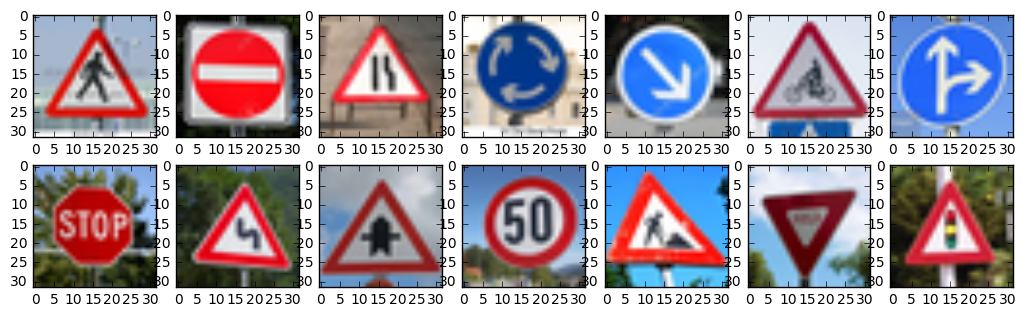

In [275]:

fig = plt.figure(num=0,figsize=(10,3))
plotrows = 2
plotcols = 7
rowratio = 1/(plotrows)
colratio = 1/(plotcols)
for row in range(plotrows):
    for col in range(plotcols):
        rect = [col*colratio+0.01, row*rowratio+0.01, colratio-0.02, rowratio-0.02]
        subplot = fig.add_axes(rect)
        index = col + row*plotcols
        subplot.imshow(images[index])

In [276]:
print("Started")
#convert the images from a PIL image to an ndarray and stack them together in another ndarray
new_image_count = len(images)
input_list = np.ndarray((new_image_count,32,32,3))
# for image in images:
#     input_list = np.append(input_list,[mpimg.pil_to_array(image)], axis=0)

#Convert image to ndarray then histogram equalize
for i in range(new_image_count):
    img = mpimg.pil_to_array(images[i])
    img = exposure.equalize_adapthist(img)
    input_list[i] = img
print("Finished equalizing images. Start padding")


#pad input
input_list = np.pad(input_list, ((0,0), (2,2), (2,2), (0,0)), 'constant')
print("Finished padding")

output_list = [14, 21, 11, 2, 25, 13, 26, 27, 17, 24, 40, 38, 29, 36]

# print(type(input_list))
print(input_list.shape)
# print(input_list)



Started
Finished equalizing images. Start padding
Finished padding
(14, 36, 36, 3)


/Users/cvar/PythonPrograms/DataAnalysis/miniconda3/envs/IntroToTensorFlow/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


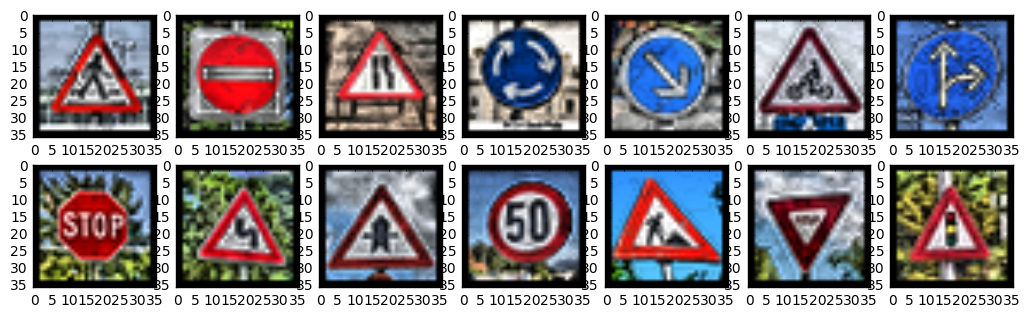

In [277]:

fig = plt.figure(num=0,figsize=(10,3))
plotrows = 2
plotcols = 7
rowratio = 1/(plotrows)
colratio = 1/(plotcols)
for row in range(plotrows):
    for col in range(plotcols):
        rect = [col*colratio+0.01, row*rowratio+0.01, colratio-0.02, rowratio-0.02]
        subplot = fig.add_axes(rect)
        index = col + row*plotcols
        subplot.imshow(input_list[index])

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

Visualizations of new images above:
-----

Signs are not always centered in the pictures and some of the signs were photographed with a slight angle, these will pose challenges to the classifier.  

Also, photos may not be as 'clean' as the training data so noise in the background of the photo can interfere with the clasificaiton.

Something else to consider is that I don't know exactly what the sign look like in europe.  So when I picked signs off of the internet to be classified, it is possible that some of my signs were completly out of sample.




In [278]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

out = []
logit_result = []
softmax_result = []
with tf.Session() as sess:
    print("started")
    old_file_name = "lenet"
    saver.restore(sess, old_file_name)
    
    test_accuracy = evaluate(input_list, output_list)
    print("test_accuracy", test_accuracy)
    
    logit_result = sess.run(logits, feed_dict={x:input_list})
    softmax_result = sess.run(tf.nn.softmax(logit_result))
    print("finished")



started
test_accuracy 0.428571432829
finished


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
The model predicted 6 out of 14 correctly

In [279]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

# print("out")
# print(out)
# print("Logit Result")
# print(logit_result)
top_logit = []
top_soft = []
with tf.Session() as sess:
    print("started")
    top_logit = sess.run(tf.nn.top_k(logit_result, k=4))
    top_soft = sess.run(tf.nn.top_k(softmax_result, k=4))
    
print("Finished")

started
Finished


In [280]:
print("Top K:")
print(top_soft[0])
print(top_soft[1])
print()
print("Real Labels:", output_list)

Top K:
[[  9.99999285e-01   7.04233059e-07   1.02549800e-11   1.10417567e-12]
 [  7.74007618e-01   1.81460038e-01   3.80788818e-02   3.13337077e-03]
 [  9.99534488e-01   4.65526013e-04   9.67430136e-09   2.60045274e-09]
 [  7.57431328e-01   2.42437065e-01   1.29913373e-04   7.25147856e-07]
 [  1.00000000e+00   1.82772997e-08   7.65451813e-10   3.31236801e-13]
 [  1.00000000e+00   8.62946813e-13   4.11211118e-15   1.88670845e-16]
 [  5.67889929e-01   4.32108641e-01   1.39259862e-06   1.29328415e-09]
 [  9.85754371e-01   1.42404204e-02   3.45766239e-06   1.65321455e-06]
 [  9.99864578e-01   1.28521366e-04   5.07536788e-06   1.18323328e-06]
 [  9.94216144e-01   5.56207355e-03   2.19464579e-04   2.11318252e-06]
 [  9.87685204e-01   9.35241953e-03   2.34122854e-03   6.10301155e-04]
 [  9.99961257e-01   3.86477550e-05   6.49015277e-08   9.86984894e-09]
 [  9.21718121e-01   4.92026210e-02   1.15203010e-02   9.02618468e-03]
 [  5.63338161e-01   3.45848858e-01   6.78961650e-02   2.04581432e-02]

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

After visualizing the top k of the softmax function it seems that the model was extremely confident about all but one prediction.  

The model only guessed 6 out of 14 correct but only 3 of the incorrect predictions did not have the correct answer sitting in the top k.  With 11 out of 14 in the top K it is a start in the right direction but still very subpar for a traffic sign classifier.  This result is likely attributed to the differences between the images I found and the images in the data set.  I set aside some images for a final test below and the accuracy was 98.5%, much better than the 42% for my out of sample images that I found on the internet.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [281]:
#test accuracy
with tf.Session() as sess:
    print("started")
    old_file_name = "lenet"
    saver.restore(sess, old_file_name)
    
    test_accuracy = evaluate(my_test_x, my_test_y)
    print("test_accuracy", test_accuracy)

started
test_accuracy 0.985022126276
